In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

np.random.seed(0)
n = 400
X1 = np.random.uniform(0, 2*np.pi, n)
X2 = np.random.uniform(0, 2*np.pi, n)
noise = np.random.normal(0, 1, n)

Y = 10 * np.sin(X1) + 15 * np.sin(X2) + noise


A = np.column_stack([np.sin(X1), np.sin(X2)])
df = pd.DataFrame(A, columns=['sinX1', 'sinX2'])
df['Y'] = Y

lr = LinearRegression(fit_intercept=True)
lr.fit(A, Y)
intercept = lr.intercept_
coefs = lr.coef_

y_pred = lr.predict(A)
residuals = Y - y_pred

SSE = np.sum(residuals**2)
MSE = mean_squared_error(Y, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(Y, y_pred)

print("SKLEARN OLS")
print("Intercept:", intercept)
print("Coefficients (sinX1, sinX2):", coefs)
print(f"Sum of residuals: {residuals.sum():.3e}")
print(f"SSE: {SSE:.6f}, MSE: {MSE:.6f}, RMSE: {RMSE:.6f}, R^2: {R2:.6f}")
print()


X_design = np.hstack([np.ones((n,1)), A])
beta_hat = np.linalg.pinv(X_design.T @ X_design) @ X_design.T @ Y
print("NORMAL-EQN OLS (Intercept, coef_sinX1, coef_sinX2):")
print(beta_hat)


y_hat_ne = X_design @ beta_hat
res_ne = Y - y_hat_ne
print(f"Sum residuals (normal-eq): {res_ne.sum():.3e}, SSE: {np.sum(res_ne**2):.6f}")
print()


X_sm = sm.add_constant(A)
sm_model = sm.OLS(Y, X_sm).fit()
print("STATSMODELS OLS SUMMARY (first lines):")
print(sm_model.summary().tables[0])
print()
print(sm_model.summary().tables[1])


print("\nNote: true coefficients on sin(X1), sin(X2) are 10 and 15 respectively.")


SKLEARN OLS
Intercept: -0.014650810376830803
Coefficients (sinX1, sinX2): [ 9.8641806  14.98709762]
Sum of residuals: -1.208e-13
SSE: 362.801126, MSE: 0.907003, RMSE: 0.952367, R^2: 0.994053

NORMAL-EQN OLS (Intercept, coef_sinX1, coef_sinX2):
[-1.46508104e-02  9.86418060e+00  1.49870976e+01]
Sum residuals (normal-eq): -7.123e-13, SSE: 362.801126

STATSMODELS OLS SUMMARY (first lines):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.318e+04
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:01:17   Log-Likelihood:                -548.05
No. Observations:                 400   AIC:                             1102.
Df Residuals:                     397   BIC:              

Estimated Intercept (θ₀): -36.24631889813795
Estimated Slope (θ₁): 9.348301406497727

Sum of residuals = 14.405182259866688
Sum of Squared Errors (SSE) = 4706.767085426361
Mean Squared Error (MSE) = 46.144775347317264
R² score = 0.3707569232254778


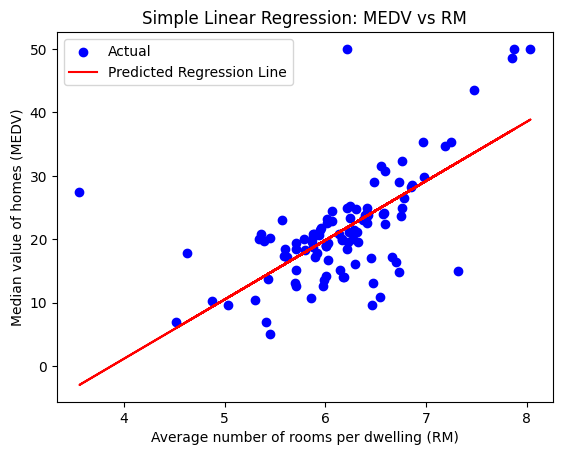

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

X = df[["RM"]]
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

theta0 = model.intercept_
theta1 = model.coef_[0]

print("Estimated Intercept (θ₀):", theta0)
print("Estimated Slope (θ₁):", theta1)

y_pred = model.predict(X_test)


residuals = y_test - y_pred
sse = np.sum(residuals ** 2)
sum_residuals = np.sum(residuals)

print("\nSum of residuals =", sum_residuals)
print("Sum of Squared Errors (SSE) =", sse)
print("Mean Squared Error (MSE) =", mean_squared_error(y_test, y_pred))
print("R² score =", r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Regression Line')
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Median value of homes (MEDV)")
plt.title("Simple Linear Regression: MEDV vs RM")
plt.legend()
plt.show()

Original Data:
     f1   f2   f3   f4
0  1.0  2.0  3.0  4.0
1  5.0  5.0  6.0  7.0
2  1.0  4.0  2.0  3.0
3  5.0  3.0  2.0  1.0
4  8.0  1.0  2.0  2.0 

Mean of each feature:
 f1    4.0
f2    3.0
f3    3.0
f4    3.4
dtype: float64 

Centered Data (mean = 0):
     f1   f2   f3   f4
0 -3.0 -1.0  0.0  0.6
1  1.0  2.0  3.0  3.6
2 -3.0  1.0 -1.0 -0.4
3  1.0  0.0 -1.0 -2.4
4  4.0 -2.0 -1.0 -1.4 

Covariance Matrix:
       f1    f2    f3    f4
f1  9.00 -1.50  0.25 -1.25
f2 -1.50  2.50  1.75  2.25
f3  0.25  1.75  3.00  3.75
f4 -1.25  2.25  3.75  5.30 

Eigenvalues (descending):
 [10.6066305   7.90808697  1.19062586  0.09465667] 

Eigenvectors (columns are PCs):
          PC1       PC2       PC3       PC4
f1 -0.694785  0.698927 -0.113373  0.126180
f2  0.348208  0.170354 -0.908222  0.157684
f3  0.323412  0.479971  0.073006 -0.812221
f4  0.539843  0.502103  0.396169  0.547277 

Explained Variance Ratio:
 [0.53568841 0.39939833 0.06013262 0.00478064] 

Projected Data (Principal Component Scores):
   

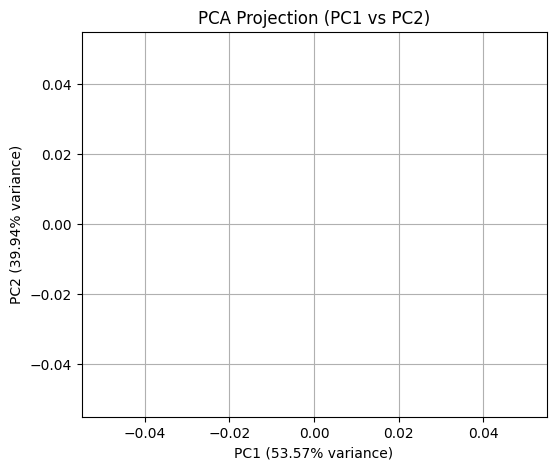

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = np.array([
    [1, 2, 3, 4],
    [5, 5, 6, 7],
    [1, 4, 2, 3],
    [5, 3, 2, 1],
    [8, 1, 2, 2]
], dtype=float)

df = pd.DataFrame(data, columns=['f1', 'f2', 'f3', 'f4'])
print("Original Data:\n", df, "\n")

means = df.mean(axis=0)
centered = df - means
print("Mean of each feature:\n", means, "\n")
print("Centered Data (mean = 0):\n", centered, "\n")

cov_matrix = np.cov(centered, rowvar=False)
print("Covariance Matrix:\n", pd.DataFrame(cov_matrix, index=df.columns, columns=df.columns), "\n")

eigvals, eigvecs = np.linalg.eigh(cov_matrix)

idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

print("Eigenvalues (descending):\n", eigvals, "\n")
print("Eigenvectors (columns are PCs):\n",
pd.DataFrame(eigvecs, index=df.columns, columns=['PC1', 'PC2', 'PC3', 'PC4']), "\n")

explained_variance_ratio = eigvals / eigvals.sum()
print("Explained Variance Ratio:\n", explained_variance_ratio, "\n")

projected = centered.dot(eigvecs)
proj_df = pd.DataFrame(projected, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print("Projected Data (Principal Component Scores):\n", proj_df, "\n")

pca = PCA(n_components=4)
pca.fit(df)
print("sklearn PCA - Explained Variance Ratio:\n", pca.explained_variance_ratio_)
print("sklearn PCA - Components (PC directions):\n",
      pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2', 'PC3', 'PC4']), "\n")

# Step 9: Visualization (first two PCs)
plt.figure(figsize=(6, 5))
plt.scatter(proj_df['PC1'], proj_df['PC2'], color='blue', s=100)
for i, txt in enumerate(df.index):
    plt.annotate(f"Sample {i+1}", (proj_df['PC1'][i]+0.1, proj_df['PC2'][i]))
plt.title("PCA Projection (PC1 vs PC2)")
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.2f}% variance)")
plt.grid(True)
plt.show()
